In [1]:
import json
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
from datetime import datetime

# 1 - Preparação dos dados

Para essa análise, vamos carregar 2 Datasets do site TMDB - https://www.themoviedb.org/
<br><br>
<b>tmdb_5000_movies</b> - Dataset com as informações dos filmes.<br>
<b>tmdb_5000_credits</b> - Dataset com as informações dos elencos e equipes envolvidas na produção dos filmes.

In [2]:
df_mov = pd.read_csv('Dataset/tmdb_5000_movies.csv')
df_cred = pd.read_csv('Dataset/tmdb_5000_credits.csv')

O primeiro DF chama-se <b>df_mov</b> e vai receber os dados do Dataset <b>tmdb_5000_movies</b> com as seguintes colunas:
<br>
<ul>
    <li><b>budget:</b> Valor investido no filme;</li>
    <li><b>genre:</b> Gênero do filme (ação, comédia, drama, etc);</li>
    <li><b>homepage:</b> Site do filme;</li>
    <li><b>id:</b> Identificador único para cada filme (relaciona com o movie_id do segundo DF);</li>
    <li><b>keywords:</b> Palavras chaves relacionadas ao filme;</li>
    <li><b>original_language:</b> Linguagem original do filme;</li>
    <li><b>original_title:</b> Título do filme antes das traduções;</li>
    <li><b>overview:</b> Descrição do filme;</li>
    <li><b>popularity:</b> Popularidade do filme;</li>
    <li><b>production_companies:</b> Produtora do filme;</li>
    <li><b>production_countries:</b> País onde o filme foi produzido;</li>
    <li><b>release_date:</b> Data que o filme foi lançado;</li>
    <li><b>revenue:</b> Receita gerada pelo filme;</li>
    <li><b>runtime:</b> Duração do filme em minutos;</li>
    <li><b>status:</b> Indica se o filme foi lançado, está em produção, etc;</li>
    <li><b>tagline:</b> Tagline do filme;</li>
    <li><b>title:</b> Título do filme;</li>
    <li><b>vote_average:</b> Média dos votos que o filme recebeu;</li>
    <li><b>vote_count:</b> Contagem dos votos que o filme recebeu;</li>
</ul>
<br>
O segundo DF chama-se <b>df_cred</b> e vai receber os dados do Dataset <b>tmdb_5000_credits</b> com as seguintes colunas:
<br>
<ul>
    <li><b>movie_id:</b> Identificador único para cada filme;</li>
    <li><b>cast:</b> Elenco do filme;</li>
    <li><b>crew:</b> Equipe (diretor, editor, roteirista, etc) que trabalhou no filme;</li>
</ul>
<br>
Vamos dar uma olhada nos DFs?

In [3]:
df_mov.head(2)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500


In [4]:
df_cred.head(2)

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."


Como os dois DFs tratam do mesmo assunto, porém, com colunas diferentes, podemos juntar os dois em um só.

Vamos criar um novo DF e chamá-lo de "df_full" e inserir os dois DFs que criamos acima.

Para isso, o primeiro passo é renomear a coluna "movie_id" do "df_cred" para deixá-lo igual ao "df_mov", e assim poder juntar os dois.

In [5]:
df_cred.columns = ['id','tittle','cast','crew']
df_full = df_mov.merge(df_cred, on='id')

Seria bom inserir uma coluna com o lucro do filme no DF, não é? Então vamos aproveitar para inserir o lucro percentual também.

In [6]:
df_full['profit'] = df_full.revenue - df_full.budget
df_full['profit_perc'] = np.where(df_full.budget != 0, np.where(df_full.revenue != 0, (df_full.profit / df_full.budget) * 100, 0), 0)

O próximo passo é converter a coluna <b>release_date</b> para o formato datetime do pandas.

In [7]:
df_full['release_date'] = pd.to_datetime(df_full.release_date, format="%Y-%m-%d")

Agora vamos ver como ficou o novo DF.

In [8]:
df_full.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,status,tagline,title,vote_average,vote_count,tittle,cast,crew,profit,profit_perc
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,Released,Enter the World of Pandora.,Avatar,7.2,11800,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",2550965087,1076.356577
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",661000000,220.333333
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,Released,A Plan No One Escapes,Spectre,6.3,4466,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...",635674609,259.459024
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,Released,The Legend Ends,The Dark Knight Rises,7.6,9106,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de...",834939099,333.975640
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,Released,"Lost in our world, found in another.",John Carter,6.1,2124,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de...",24139100,9.284269


Qual o tamanho do DataFrame?

In [9]:
size = df_full.shape
print(f"O DF possui {size[1]} colunas e {size[0]} linhas.")

O DF possui 25 colunas e 4803 linhas.


Temos valores nulos no DF? Qual o datatype das colunas?

In [10]:
df_info = pd.DataFrame(df_full.dtypes).T.rename(index={0:'column type'})
df_info = df_info.append(pd.DataFrame(df_full.isnull().sum()).T.rename(index={0:'null values'}))
df_info = df_info.append(pd.DataFrame(df_full.isnull().sum()/df_full.shape[0]*100).T.
                         rename(index={0:'null values (%)'}))
df_info

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,status,tagline,title,vote_average,vote_count,tittle,cast,crew,profit,profit_perc
column type,int64,object,object,int64,object,object,object,object,float64,object,...,object,object,object,float64,int64,object,object,object,int64,float64
null values,0,0,3091,0,0,0,0,3,0,0,...,0,844,0,0,0,0,0,0,0,0
null values (%),0,0,64.3556,0,0,0,0,0.062461,0,0,...,0,17.5724,0,0,0,0,0,0,0,0


Quais são as principais métricas do DF?

In [11]:
df_full.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count,profit,profit_perc
count,4.803000e+03,4803.000000,4803.000000,4.803000e+03,4801.000000,4803.000000,4803.000000,4.803000e+03,4.803000e+03
mean,2.904504e+07,57165.484281,21.492301,8.226064e+07,106.875859,6.092172,690.217989,5.321560e+07,1.985820e+05
std,4.072239e+07,88694.614033,31.816650,1.628571e+08,22.611935,1.194612,1234.585891,1.359677e+08,1.234915e+07
min,0.000000e+00,5.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,-1.657101e+08,-9.999995e+01
25%,7.900000e+05,9014.500000,4.668070,0.000000e+00,94.000000,5.600000,54.000000,-7.995375e+05,0.000000e+00
50%,1.500000e+07,14629.000000,12.921594,1.917000e+07,103.000000,6.200000,235.000000,2.511317e+06,4.659315e+00
75%,4.000000e+07,58610.500000,28.313505,9.291719e+07,118.000000,6.800000,737.000000,5.531286e+07,2.157066e+02
max,3.800000e+08,459488.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000,2.550965e+09,8.499999e+08


O próximo passo é definir um <b>rating</b> para o filme e vamos utilizar a fórmula do IMDB para isso, que consiste em:
<br><br>
(v ÷ (v+m)) × R + (m ÷ (v+m)) × C    
<ul>
    <li><b>R</b> = Média do filme (vote_average);</li>
    <li><b>v</b> = Número de votos do filme (vote_count);</li>
    <li><b>m</b> = Mínimo de votos que um filme precisa ter para ser listado;</li>
    <li><b>C</b> = Média de todos os filmes;</li>
</ul>

In [12]:
C = df_full['vote_average'].mean()
m = df_full['vote_count'].quantile(0.91)

Como o <b>rating</b> será aplicado em todo o DF, é melhor criar uma função para fazer isso.
<br><br>
A função recebe o <b>df_full</b>, as variáveis <b>C</b> e <b>m,</b> criadas acima e retorna o cálculo baseado na fórmula do IMDB.

In [13]:
def score_rating(df, m, C):
    v = df['vote_count']
    R = df['vote_average']

    return (v/(v+m) * R) + (m/(m+v) * C)

Agora só precisamos criar a coluna <b>rating</b> no <b>df_full</b> e atribuir a função que criamos acima, passando os parâmetros necessários.
<br><br>
Vamos dar uma olhada como ficou?

In [14]:
df_full['rating'] = score_rating(df_full, m=m, C=C)
df_full.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,tagline,title,vote_average,vote_count,tittle,cast,crew,profit,profit_perc,rating
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,Enter the World of Pandora.,Avatar,7.2,11800,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",2550965087,1076.356577,7.039176
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",661000000,220.333333,6.651100
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,A Plan No One Escapes,Spectre,6.3,4466,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...",635674609,259.459024,6.235630
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,The Legend Ends,The Dark Knight Rises,7.6,9106,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de...",834939099,333.975640,7.328030
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,"Lost in our world, found in another.",John Carter,6.1,2124,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de...",24139100,9.284269,6.096200


Algumas colunas do <b>df_full</b> são do tipo objeto e seria interessante transformar esses objetos em outros DFs para utilizarmos nas análises. Vamos converter as seguintes colunas:
<br><br>
<b>genres</b> - Gêneros;<br>
<b>keywords</b> - Palavras Chaves;<br>
<b>production_companies</b> - Produtoras;<br>
<b>cast</b> - Elecon;<br>
<b>crew</b> - Equipe;<br>
<br>
Ah! Vamos criar um DF contento apenas o ID e Título dos filmes, para podermos fazer o relacionamento.

<b>df_movies</b>

In [15]:
id_movie = df_full.id
title_movie = df_full.tittle

data = {
    'id': df_full.id, 
    'tittle':  df_full.tittle
}

df_movies = pd.DataFrame(data)
df_movies

,id,tittle
0,19995,Avatar
1,285,Pirates of the Caribbean: At World's End
2,206647,Spectre
3,49026,The Dark Knight Rises
4,49529,John Carter
...,...,...
4798,9367,El Mariachi
4799,72766,Newlyweds
4800,231617,"Signed, Sealed, Delivered"
4801,126186,Shanghai Calling


<b>df_genres</b>

In [16]:
ids = list()
genres = list()
    
for i in range(len(df_full)):
    js = json.loads(df_full.genres[i])
    
    for g in js:
        ids.append((df_full.id[i], df_full.title[i], g['name']))
        genres.append(g['name'])
        
df_genres_movies = pd.DataFrame(ids)
df_genres_movies.columns = ['id', 'title', 'genre']

df_genres = pd.DataFrame(set(genres))
df_genres.columns = ['genre']
df_genres.head()

,genre
0,War
1,Thriller
2,Mystery
3,Science Fiction
4,Crime


<b>df_keywords</b>

In [17]:
keys = list()
    
for i in range(len(df_full)):
    js = json.loads(df_full.keywords[i])
    
    for k in js:
        keys.append(k['name'])

df_keywords = pd.DataFrame(keys)
df_keywords.columns = ['keywords']
df_keywords.head()

,keywords
0,culture clash
1,future
2,space war
3,space colony
4,society


<b>df_pc</b>

In [18]:
pcs = list()
    
for i in range(len(df_full)):
    js = json.loads(df_full.production_companies[i])
    
    for g in js:
        pcs.append(g['name'])
        
df_pc = pd.DataFrame(set(pcs))
df_pc.columns = ['production_companies']
df_pc.head()

,production_companies
0,Parker Film Company
1,UTV Motion Pictures
2,Parkwood Entertainment
3,Dangerous Method Film AG
4,Storm King Productions


<b>df_movies_cast</b>

In [19]:
ids = list()
cast = list()
    
for i in range(len(df_full)):
    js = json.loads(df_full.cast[i])
    
    for g in js:
        ids.append((df_full.id[i], df_full.title[i], g['cast_id'], g['character'], g['credit_id'], g['gender'], g['id'], g['name'], g['order']))
        
df_movies_cast = pd.DataFrame(ids)
df_movies_cast.columns = ['id', 'title', 'cast_id', 'character', 'credit_id', 'gender', 'id_actor', 'name_actor', 'order']

df_movies_cast.head()

,id,title,cast_id,character,credit_id,gender,id_actor,name_actor,order
0,19995,Avatar,242,Jake Sully,5602a8a7c3a3685532001c9a,2,65731,Sam Worthington,0
1,19995,Avatar,3,Neytiri,52fe48009251416c750ac9cb,1,8691,Zoe Saldana,1
2,19995,Avatar,25,Dr. Grace Augustine,52fe48009251416c750aca39,1,10205,Sigourney Weaver,2
3,19995,Avatar,4,Col. Quaritch,52fe48009251416c750ac9cf,2,32747,Stephen Lang,3
4,19995,Avatar,5,Trudy Chacon,52fe48009251416c750ac9d3,1,17647,Michelle Rodriguez,4


<b>df_movies_crew</b>

In [20]:
ids = list()
crew = list()
    
for i in range(len(df_full)):
    js = json.loads(df_full.crew[i])
    
    for g in js:
        ids.append((df_full.id[i], df_full.title[i], g['credit_id'], g['department'], g['gender'], g['id'], g['job'], g['name']))

df_movies_crew = pd.DataFrame(ids)
df_movies_crew.columns = ['id', 'title', 'credit_id', 'department', 'gender', 'id_crew', 'job', 'name_crew']

df_movies_crew.head()

,id,title,credit_id,department,gender,id_crew,job,name_crew
0,19995,Avatar,52fe48009251416c750aca23,Editing,0,1721,Editor,Stephen E. Rivkin
1,19995,Avatar,539c47ecc3a36810e3001f87,Art,2,496,Production Design,Rick Carter
2,19995,Avatar,54491c89c3a3680fb4001cf7,Sound,0,900,Sound Designer,Christopher Boyes
3,19995,Avatar,54491cb70e0a267480001bd0,Sound,0,900,Supervising Sound Editor,Christopher Boyes
4,19995,Avatar,539c4a4cc3a36810c9002101,Production,1,1262,Casting,Mali Finn


# Análise Exploratória

Pronto, agora que já temos os dataframes definidos, chegou a hora de montar as análises, porém, vamos recapitular os DFs que vamos utlizar daqui pra frente.
<br>
<ul>
    <li><b>df_full</b> - DF com todas as informações dos filmes;</li>
    <li><b>df_genres</b> - DF com os gêneros dos filmes;</li>
    <li><b>df_keywords</b> - DF com as palavras chaves dos filmes;</li>
    <li><b>df_pc</b> - DF com as produtoras dos filme;</li>
    <li><b>df_movies_cast</b> - DF com o elenco dos filmes;</li>
    <li><b>df_movies_crew</b> - DF com as equipes de produção dos filmes;</li>
</ul>

<b>1 - Keywords</b>

Quais são as palavras chaves mais usadas nos filmes?

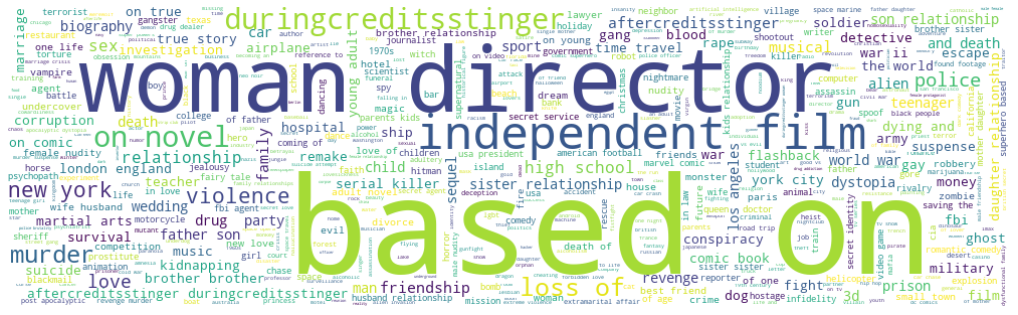

In [21]:
texts = ' '.join([text for text in df_keywords.keywords])

wordcloud = WordCloud(width=1000,
                      height=300, 
                      background_color='white', 
                      max_words=500,
                      relative_scaling=1,
                      normalize_plurals=False).generate(texts)

fig = plt.figure(1, figsize=(18,13))
ax1 = fig.add_subplot(2,1,1)
ax1.imshow(wordcloud, interpolation="bilinear")
ax1.axis('off')

plt.show()

<b>2 - Filmes</b>

Top 20 Filmes - <b>Total de Votos</b>

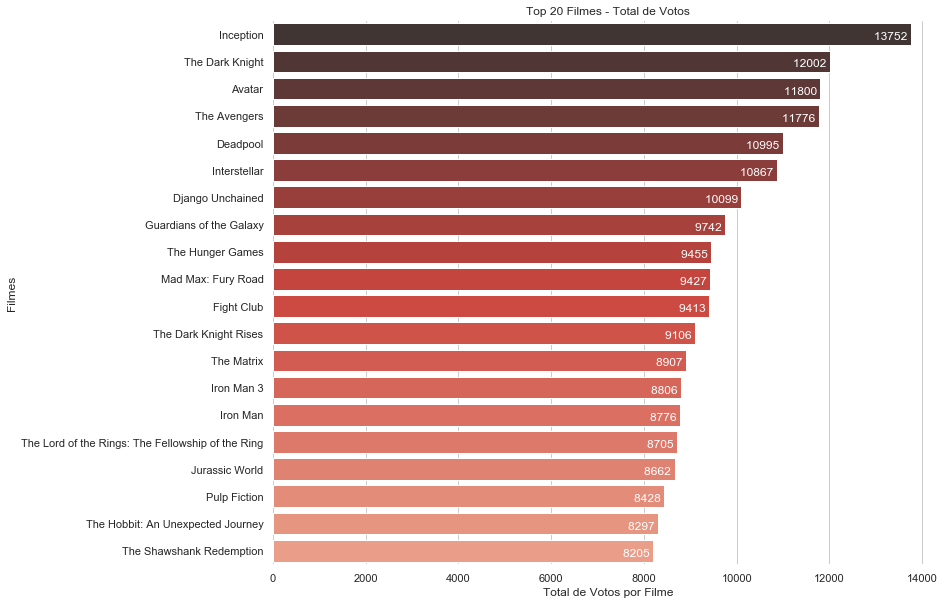

In [22]:
sns.set(style="whitegrid")
f, ax = plt.subplots(figsize=(12, 10))

votes = df_full.sort_values("vote_count", ascending=False)[:20]

# Gráfico
sns.barplot(y="title",
            x="vote_count", 
            data=votes,
            label="Total", 
            color="b",
            palette=sns.color_palette("Reds_d", len(votes)))

# Insere os valores dentro das barras
for p in ax.patches:
    width = p.get_width()
    ax.text(width,
            p.get_y() + p.get_height() / 2. + 0.2,
            '{:1.0f} '.format(width),
            color='white',
            ha="right")

ax.set(title='Top 20 Filmes - Total de Votos',
       xlabel="Total de Votos por Filme",
       ylabel="Filmes")
sns.despine(left=True, bottom=True)

Top 20 Filmes - <b>Média de Votos</b>

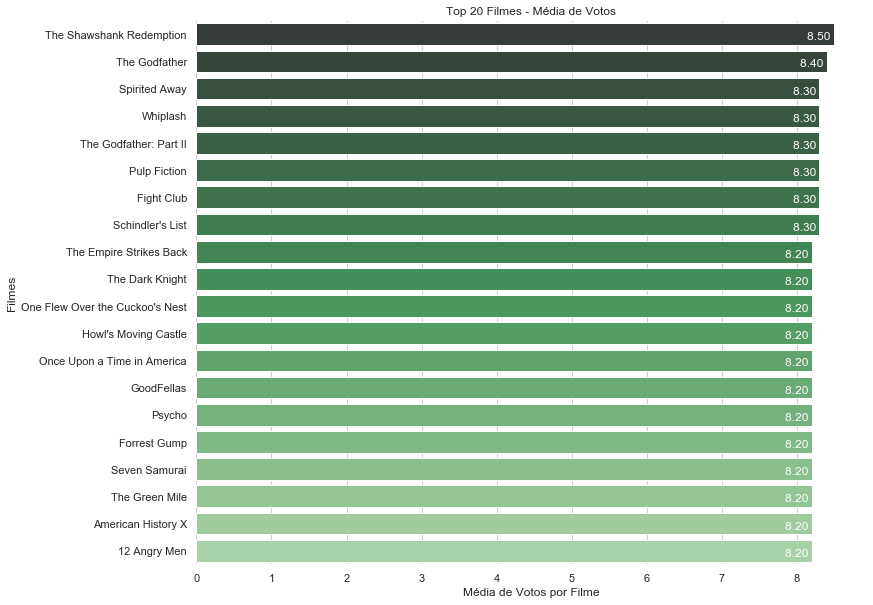

In [23]:
sns.set(style="whitegrid")
f, ax = plt.subplots(figsize=(12, 10))

votes_mean = df_full.sort_values("vote_average", ascending=False)
votes_mean = votes_mean.query("vote_count > 250")[:20]

# Gráfico
sns.barplot(y="title",
            x="vote_average", 
            data=votes_mean,
            label="Total", 
            color="b",
            palette=sns.color_palette("Greens_d", len(votes_mean)))

# Insere os valores dentro das barras
for p in ax.patches:
    width = p.get_width()
    ax.text(width,
            p.get_y() + p.get_height() / 2. + 0.2,
            '{:1.2f} '.format(width),
            color='white',
            ha="right")

ax.set(title='Top 20 Filmes - Média de Votos',
       xlabel="Média de Votos por Filme",
       ylabel="Filmes")
sns.despine(left=True, bottom=True)

Top 20 Filmes - <b>Rating</b>

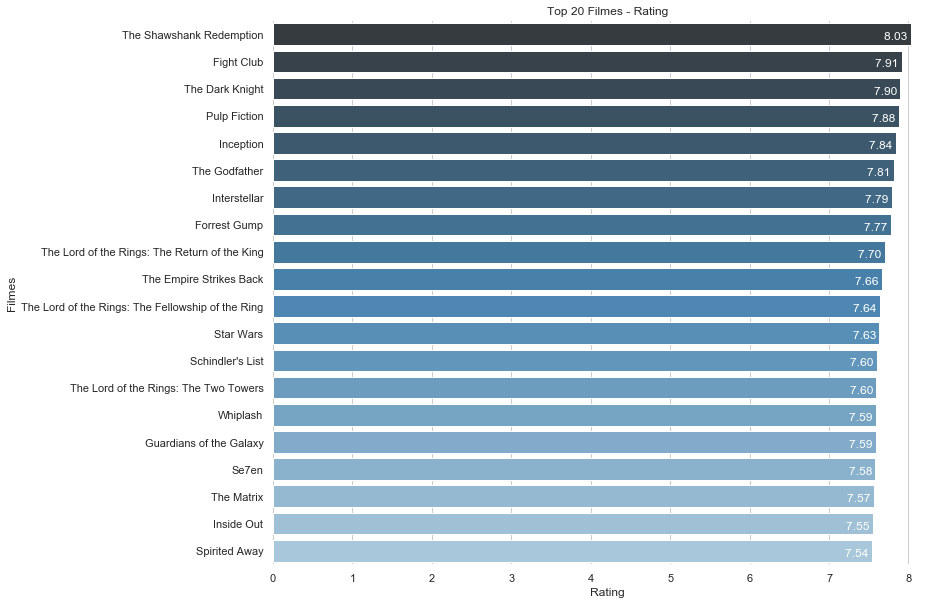

In [24]:
sns.set(style="whitegrid")
f, ax = plt.subplots(figsize=(12, 10))

rating = df_full.sort_values("rating", ascending=False)[:20]

# Gráfico
sns.barplot(y="title",
            x="rating", 
            data=rating,
            label="Total", 
            color="b",
            palette=sns.color_palette("Blues_d", len(rating)))

# Insere os valores dentro das barras
for p in ax.patches:
    width = p.get_width()
    ax.text(width,
            p.get_y() + p.get_height() / 2. + 0.2,
            '{:1.2f} '.format(width),
            color='white',
            ha="right")

ax.set(title='Top 20 Filmes - Rating',
       xlabel="Rating",
       ylabel="Filmes")
sns.despine(left=True, bottom=True)

Top 20 Filmes - <b>Popularidade</b>

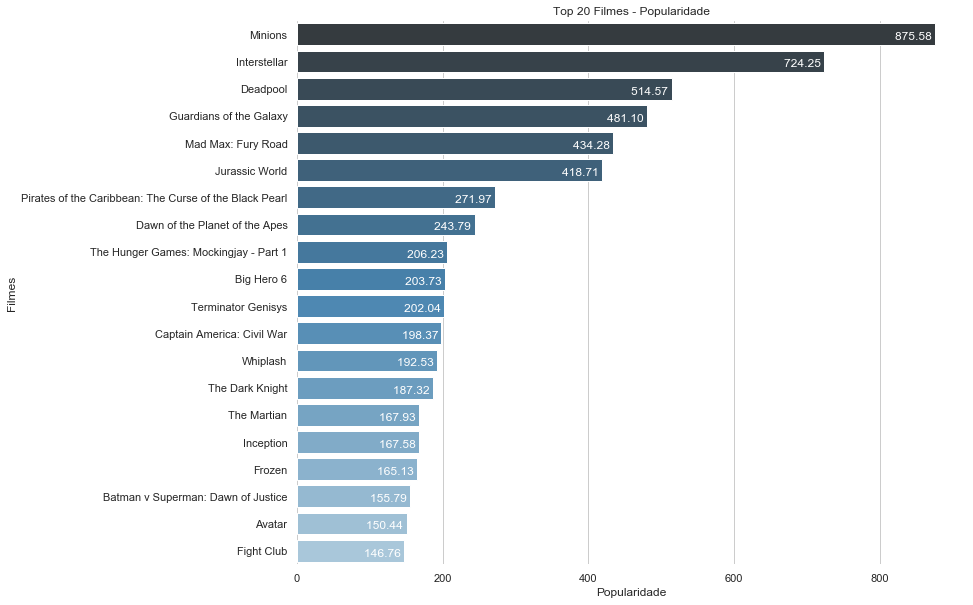

In [25]:
sns.set(style="whitegrid")
f, ax = plt.subplots(figsize=(12, 10))

popularity = df_full.sort_values("popularity", ascending=False)[:20]

# Gráfico
sns.barplot(y="title",
            x="popularity", 
            data=popularity,
            label="Total", 
            color="b",
            palette=sns.color_palette("Blues_d", len(popularity)))

# Insere os valores dentro das barras
for p in ax.patches:
    width = p.get_width()
    ax.text(width,
            p.get_y() + p.get_height() / 2. + 0.2,
            '{:1.2f} '.format(width),
            color='white',
            ha="right")

ax.set(title='Top 20 Filmes - Popularidade',
       xlabel="Popularidade",
       ylabel="Filmes")
sns.despine(left=True, bottom=True)

Como os votos estão distribuídos?

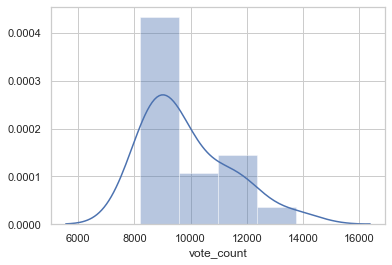

In [26]:
sns.distplot(votes.vote_count)

Top 20 Filmes - <b>Despesas</b>

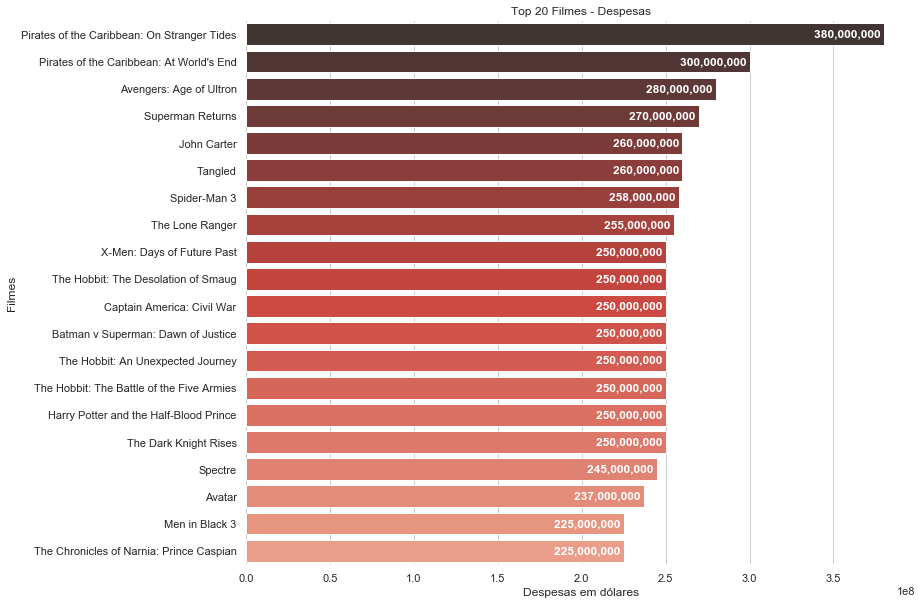

In [27]:
sns.set(style="whitegrid")
f, ax = plt.subplots(figsize=(12, 10))

budget = df_full.sort_values("budget", ascending=False)[:20]

# Gráfico
sns.barplot(y="title",
            x="budget", 
            data=budget,
            label="Total", 
            color="b",
            palette=sns.color_palette("Reds_d", len(budget)))

# Insere os valores dentro das barras
for p in ax.patches:
    width = p.get_width()
    ax.text(width,
            p.get_y() + p.get_height() / 2. + 0.1,
            '{:,} '.format(int(width)),
            color='white',
            fontweight='heavy',
            ha="right")

ax.set(title='Top 20 Filmes - Despesas',
       xlabel="Despesas em dólares",
       ylabel="Filmes")
sns.despine(left=True, bottom=True)

Top 20 Filmes - <b>Receitas</b>

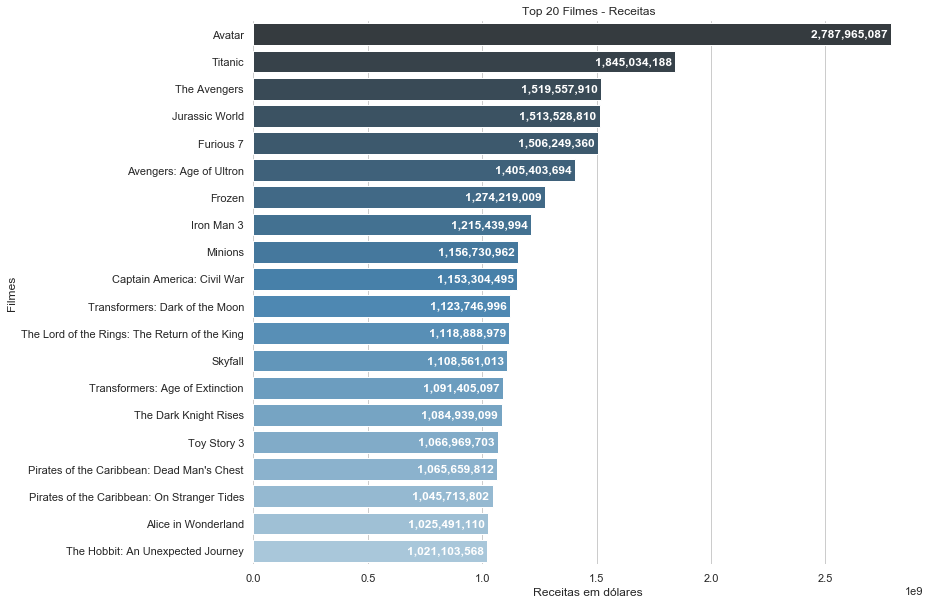

In [28]:
sns.set(style="whitegrid")
f, ax = plt.subplots(figsize=(12, 10))

revenue = df_full.sort_values("revenue", ascending=False)[:20]

# Gráfico
sns.barplot(y="title",
            x="revenue", 
            data=revenue,
            label="Total", 
            color="b",
            palette=sns.color_palette("Blues_d", len(revenue)))

# Insere os valores dentro das barras
for p in ax.patches:
    width = p.get_width()
    ax.text(width,
            p.get_y() + p.get_height() / 2. + 0.1,
            '{:,} '.format(int(width)),
            color='white',
            fontweight='heavy',
            ha="right")

ax.set(title='Top 20 Filmes - Receitas',
       xlabel="Receitas em dólares",
       ylabel="Filmes")
sns.despine(left=True, bottom=True)

Top 20 Filmes - <b>Lucro</b>

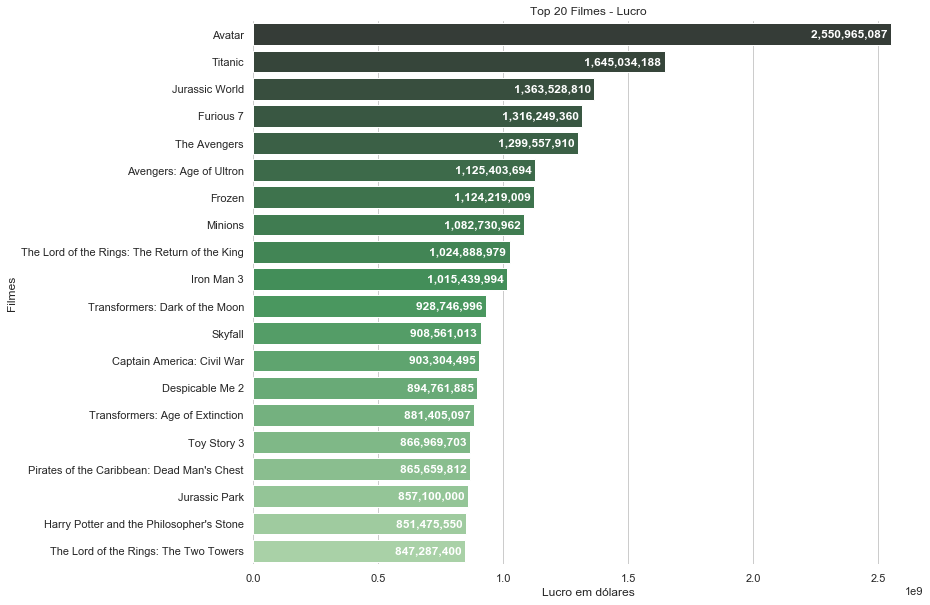

In [29]:
sns.set(style="whitegrid")
f, ax = plt.subplots(figsize=(12, 10))

profit = df_full.sort_values("profit", ascending=False)[:20]

# Gráfico
sns.barplot(y="title",
            x="profit", 
            data=profit,
            label="Total", 
            color="b",
            palette=sns.color_palette("Greens_d", len(profit)))

# Insere os valores dentro das barras
for p in ax.patches:
    width = p.get_width()
    ax.text(width,
            p.get_y() + p.get_height() / 2. + 0.1,
            '{:,} '.format(int(width)),
            color='white',
            fontweight='heavy',
            ha="right")

ax.set(title='Top 20 Filmes - Lucro',
       xlabel="Lucro em dólares",
       ylabel="Filmes")
sns.despine(left=True, bottom=True)

Top 20 Filmes - <b>Lucro Percentual</b>

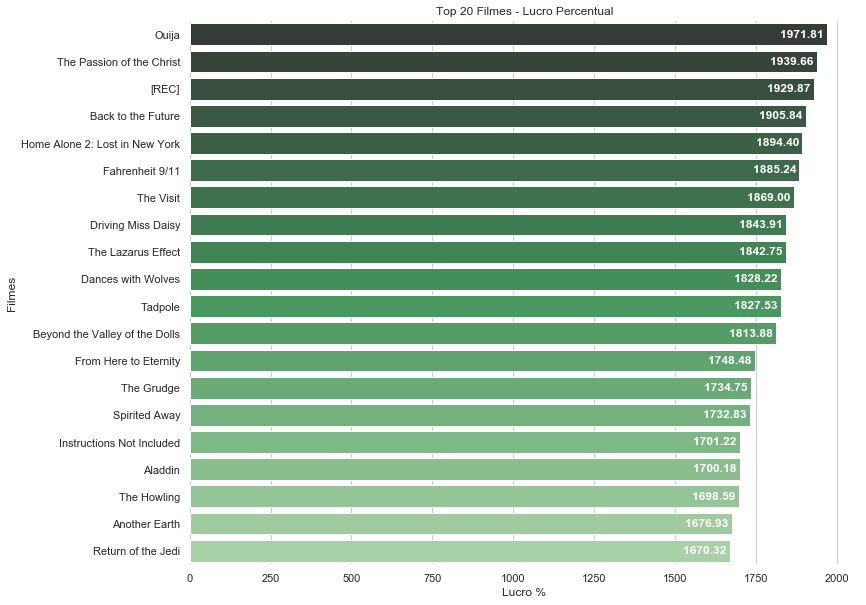

In [30]:
sns.set(style="whitegrid")
f, ax = plt.subplots(figsize=(12, 10))

profit_perc = df_full.sort_values("profit_perc", ascending=False)
profit_perc = profit_perc.query("profit_perc < 2000")[:20]

# Gráfico
sns.barplot(y="title",
            x="profit_perc", 
            data=profit_perc,
            label="Total", 
            color="b",
            palette=sns.color_palette("Greens_d", len(profit_perc)))

# Insere os valores dentro das barras
for p in ax.patches:
    width = p.get_width()
    ax.text(width,
            p.get_y() + p.get_height() / 2. + 0.1,
            '{:1.2f} '.format(width),
            color='white',
            fontweight='heavy',
            ha="right")

ax.set(title='Top 20 Filmes - Lucro Percentual',
       xlabel="Lucro %",
       ylabel="Filmes")
sns.despine(left=True, bottom=True)

Top 20 Filmes - <b>Prejuízo</b>

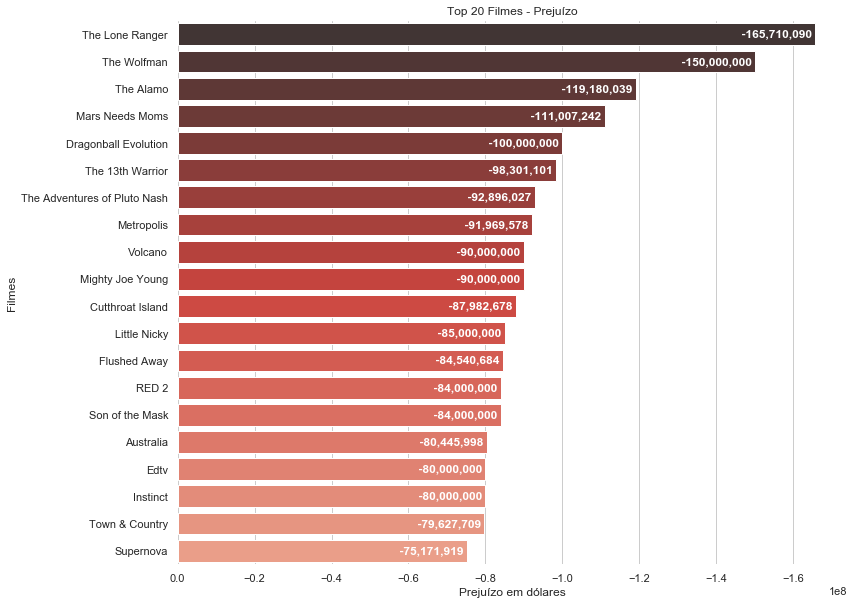

In [31]:
sns.set(style="whitegrid")
f, ax = plt.subplots(figsize=(12, 10))

profit_bottom = df_full.sort_values("profit")[:20]

# Gráfico
sns.barplot(y="title",
            x="profit", 
            data=profit_bottom,
            label="Total", 
            color="b",
            palette=sns.color_palette("Reds_d", len(profit_bottom)))

# Insere os valores dentro das barras
for p in ax.patches:
    width = p.get_width()
    ax.text(width,
            p.get_y() + p.get_height() / 2. + 0.1,
            ' {:,} '.format(int(width)),
            color='white',
            fontweight='heavy',
            ha="right")

ax.set(title='Top 20 Filmes - Prejuízo',
       xlabel="Prejuízo em dólares",
       ylabel="Filmes")
ax.invert_xaxis()
sns.despine(left=True, bottom=True)

Como foi o lançamento dos filmes ao longo das décadas?

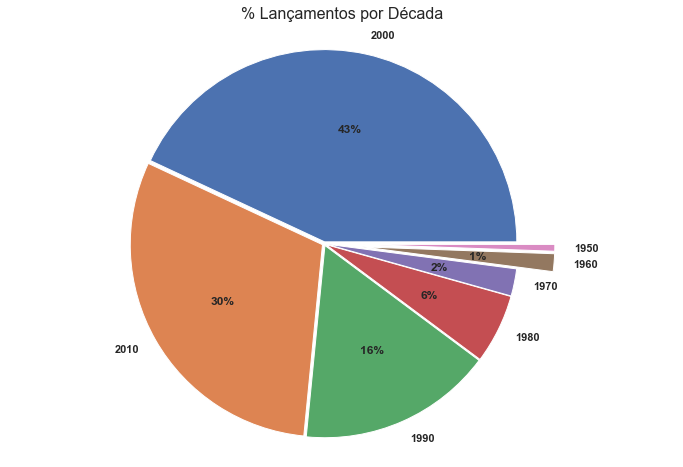

In [32]:
decades = pd.DataFrame([dt.year - dt.year%10 for dt in  df_full.release_date])
decades.columns = ['decade']

decades = pd.DataFrame(decades.decade.value_counts().reset_index(), dtype=int)
decades.columns = ['decade', 'total']
decades = decades.query("decade > 1940")

plt.rc('font', weight='bold')
f, ax = plt.subplots(figsize=(12, 8))

sizes  = decades.total.values
ax.pie(decades.total, 
       explode=[0.2 if sizes[i] < 100 else 0.01 for i in range(len(decades.decade))], 
       labels=decades.decade,
       autopct = lambda x:'{:1.0f}%'.format(x) if x > 1 else '',
       shadow=False, startangle=0)
ax.axis('equal')
ax.set_title('% Lançamentos por Década',
             fontsize=16);

<b>3 - Gêneros</b>

Quantos filmes temos por gênero?

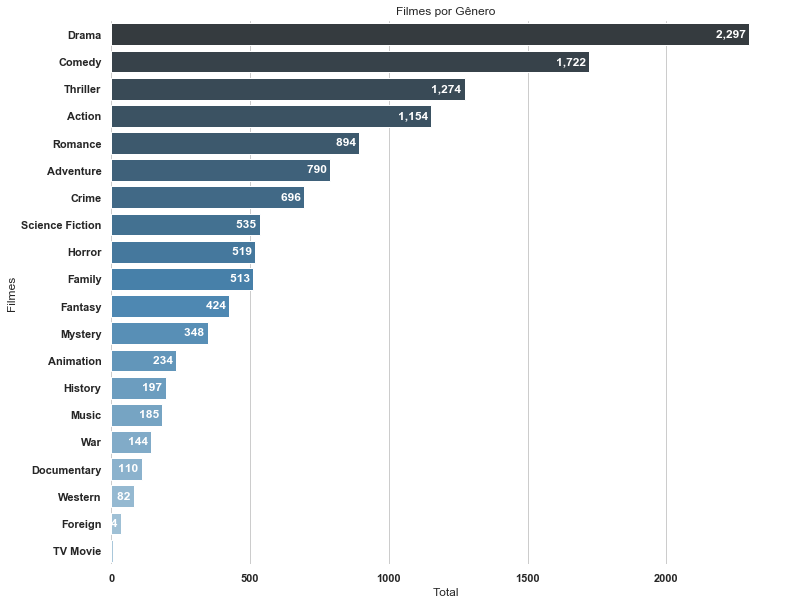

In [33]:
df_gen_count = df_genres_movies.genre.value_counts().reset_index()
df_gen_count.columns = ['genre', 'total']
df_gen_count = df_gen_count.sort_values("total", ascending=False)

sns.set(style="whitegrid")
f, ax = plt.subplots(figsize=(12, 10))

# Gráfico
sns.barplot(y="genre",
            x="total", 
            data=df_gen_count,
            label="Total", 
            color="b",
            palette=sns.color_palette("Blues_d", len(df_gen_count)))

# Insere os valores dentro das barras
for p in ax.patches:
    width = p.get_width()
    ax.text(width,
            p.get_y() + p.get_height() / 2. + 0.1,
            '{:,} '.format(int(width)),
            color='white',
            fontweight='heavy',
            ha="right")

ax.set(title='Filmes por Gênero',
       xlabel="Total",
       ylabel="Filmes")
sns.despine(left=True, bottom=True)

<b>4 - Atores</b>

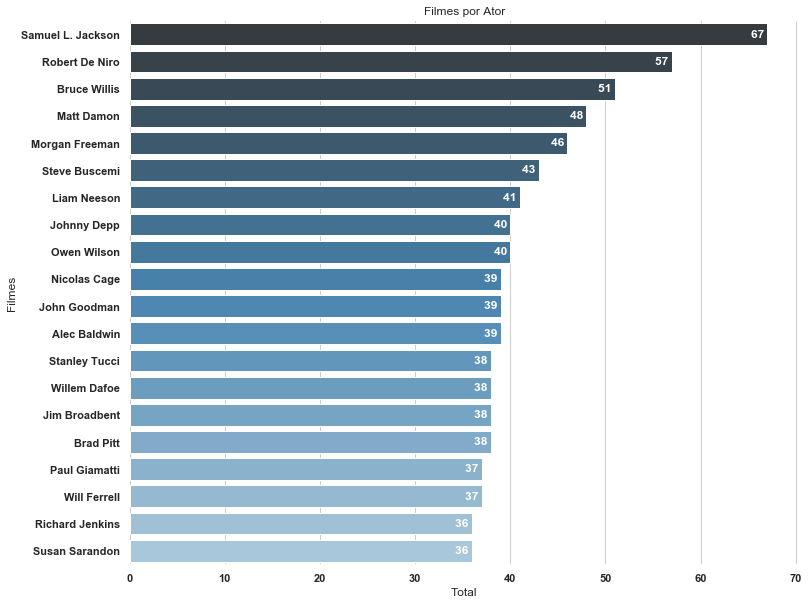

In [67]:
actors = df_movies_cast.groupby(['name_actor']).count()[['id']].reset_index()
actors = actors.sort_values("id", ascending=False)[:20]
actors.columns = ['actor', 'filmes']

sns.set(style="whitegrid")
f, ax = plt.subplots(figsize=(12, 10))

# Gráfico
sns.barplot(y="actor",
            x="filmes", 
            data=actors,
            label="Total", 
            color="b",
            palette=sns.color_palette("Blues_d", len(actors)))

# Insere os valores dentro das barras
for p in ax.patches:
    width = p.get_width()
    ax.text(width,
            p.get_y() + p.get_height() / 2. + 0.1,
            '{:,} '.format(int(width)),
            color='white',
            fontweight='heavy',
            ha="right")

ax.set(title='Filmes por Ator',
       xlabel="Total",
       ylabel="Filmes")
sns.despine(left=True, bottom=True)

<b>5 - Diretores</b>

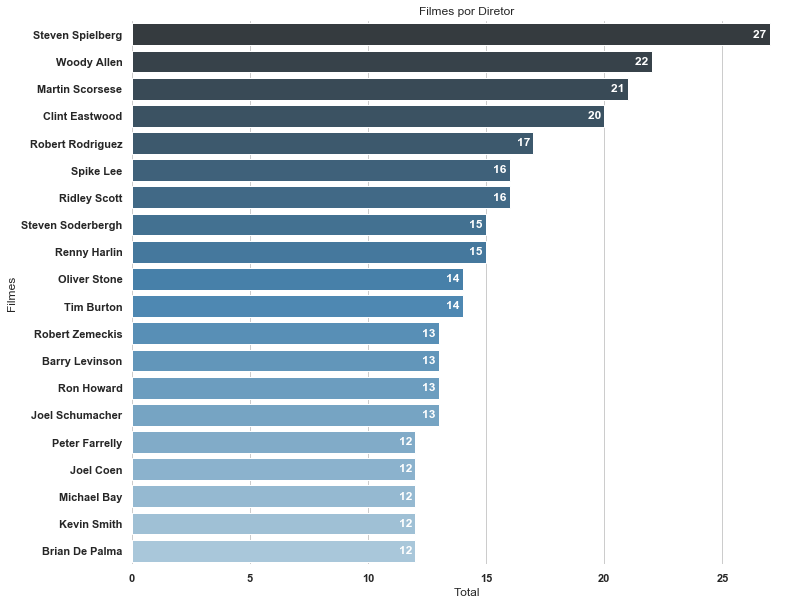

In [71]:
directors = df_movies_crew.groupby(['job', 'name_crew']).count()[['id']].reset_index()
directors = directors.query("job == 'Director'")
directors = directors.sort_values("id", ascending=False)[:20]

sns.set(style="whitegrid")
f, ax = plt.subplots(figsize=(12, 10))

# Gráfico
sns.barplot(y="name_crew",
            x="id", 
            data=directors,
            label="Total", 
            color="b",
            palette=sns.color_palette("Blues_d", len(directors)))

# Insere os valores dentro das barras
for p in ax.patches:
    width = p.get_width()
    ax.text(width,
            p.get_y() + p.get_height() / 2. + 0.1,
            '{:,} '.format(int(width)),
            color='white',
            fontweight='heavy',
            ha="right")

ax.set(title='Filmes por Diretor',
       xlabel="Total",
       ylabel="Filmes")
sns.despine(left=True, bottom=True)

<b>6 - Recomendação de Filmes</b>

Para montar um motor de recomendação de filmes, primeiramente vamos cirar um DF novo apenas com as colunas necessárias, para não ficar muito grande.

In [34]:
data = {
    'id': df_full.id,
    'title': df_full.title,
    'genres': df_full.genres,
    'keywords': df_full.keywords,
    'overview': df_full.overview,
    'cast': df_full.cast,
    'crew': df_full.crew,
    'popularity': df_full.popularity,
    'vote_average': df_full.vote_average,
    'vote_count': df_full.vote_count,
    'rating': df_full.rating,
}

df_rec = pd.DataFrame(data)
df_rec.head()

,id,title,genres,keywords,overview,cast,crew,popularity,vote_average,vote_count,rating
0,19995,Avatar,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...","In the 22nd century, a paraplegic Marine is di...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",150.437577,7.2,11800,7.039176
1,285,Pirates of the Caribbean: At World's End,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...","[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...","Captain Barbossa, long believed to be dead, ha...","[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",139.082615,6.9,4500,6.651100
2,206647,Spectre,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",A cryptic message from Bond’s past sends him o...,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...",107.376788,6.3,4466,6.235630
3,49026,The Dark Knight Rises,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...","[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",Following the death of District Attorney Harve...,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de...",112.312950,7.6,9106,7.328030
4,49529,John Carter,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 818, ""name"": ""based on novel""}, {""id"":...","John Carter is a war-weary, former military ca...","[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de...",43.926995,6.1,2124,6.096200


Nessa etapa, vamos fazer os imports necessários.

In [35]:
from ast import literal_eval
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

Agora, precisamos fazer o tratamento dos dados no nosso DF e vamos criar algumas funções para nos ajudar.
<br><br>
O primeiro tratamento é transformar as colunas do DF que, aparentemente são listas em Python, mas que na verdade ainda são strings, em listas reais. Para isso, nós importamos a função literal_val da boblioteca ast. Essa função transforma as colunas em objetos em Python. 
<br><br>
E quais são as colunas que desejamos transformar?
<br>
<ul>
    <li><b>cast</b></li>
    <li><b>crew</b></li>
    <li><b>keywords</b></li>
    <li><b>genres</b></li>
</ul>

In [36]:
df_columns = ['cast', 'crew', 'keywords', 'genres']
for feature in df_columns:
    df_rec[feature] = df_rec[feature].apply(literal_eval)

Função <b>get_director</b>
<br><br>
Varre os dados e procura pelo campo "job" e se ele for igual a "Director", retorna o nome do Diretor do filme.

In [37]:
def get_director(x):
    for i in x:
        if i['job'] == 'Director':
            return i['name']
    return np.nan

Função <b>get_list</b>
<br><br>
Recebe a coluna que vamos varrer e retorna uma lista com 5 elementos. No nosso caso, vamos aplicar a função, um pouco mais abaixo, nas colunas "cast", "keywords" e "genres".

In [38]:
def get_list(x):
    if isinstance(x, list):
        names = [i['name'] for i in x]
        
        if len(names) > 5:
            names = names[:5]
        return names
    else:
        return []

Função <b>clean_data</b>
<br><br>
Converte as strings para lower case e remove os espaços em branco.

In [39]:
def clear_data(x):
    if isinstance(x, list):
        return [str.lower(i.replace(" ", "")) for i in x]
    else:
        if isinstance(x, str):
            return str.lower(x.replace(" ", ""))
        else:
            return ''

Função <b>create_soup</b>
<br><br>
Junta todas as strings e cria uma sopa de palavras.

In [40]:
def create_soup(x):
    return ' '.join(x['keywords']) + ' ' + ' '.join(x['cast']) + ' ' + x['director'] + ' ' + ' '.join(x['genres'])

Apoós declarar as funções, vamos adicionar a coluna "director" no DF e sobrescrever os valores de "genres", "keywords" e "cast" como o novo formato de dados (lista Python).

In [41]:
df_rec['director'] = df_rec['crew'].apply(get_director)

df_columns = ['cast', 'keywords', 'genres']
for feature in df_columns:
    df_rec[feature] = df_rec[feature].apply(get_list)

df_rec = df_rec.drop(['crew'], axis=1)

In [42]:
df_rec.head()

,id,title,genres,keywords,overview,cast,popularity,vote_average,vote_count,rating,director
0,19995,Avatar,"[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","In the 22nd century, a paraplegic Marine is di...","[Sam Worthington, Zoe Saldana, Sigourney Weave...",150.437577,7.2,11800,7.039176,James Cameron
1,285,Pirates of the Caribbean: At World's End,"[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...","Captain Barbossa, long believed to be dead, ha...","[Johnny Depp, Orlando Bloom, Keira Knightley, ...",139.082615,6.9,4500,6.651100,Gore Verbinski
2,206647,Spectre,"[Action, Adventure, Crime]","[spy, based on novel, secret agent, sequel, mi6]",A cryptic message from Bond’s past sends him o...,"[Daniel Craig, Christoph Waltz, Léa Seydoux, R...",107.376788,6.3,4466,6.235630,Sam Mendes
3,49026,The Dark Knight Rises,"[Action, Crime, Drama, Thriller]","[dc comics, crime fighter, terrorist, secret i...",Following the death of District Attorney Harve...,"[Christian Bale, Michael Caine, Gary Oldman, A...",112.312950,7.6,9106,7.328030,Christopher Nolan
4,49529,John Carter,"[Action, Adventure, Science Fiction]","[based on novel, mars, medallion, space travel...","John Carter is a war-weary, former military ca...","[Taylor Kitsch, Lynn Collins, Samantha Morton,...",43.926995,6.1,2124,6.096200,Andrew Stanton


Agora vamos aplicar a função clear_data() para transformar as strings em minúsculo e retirar os espaços em branco entre elas.

In [43]:
# Apply clean_data function to your features.
df_columns = ['cast', 'keywords', 'director', 'genres']

for feature in df_columns:
    df_rec[feature] = df_rec[feature].apply(clear_data)

df_rec.head()

,id,title,genres,keywords,overview,cast,popularity,vote_average,vote_count,rating,director
0,19995,Avatar,"[action, adventure, fantasy, sciencefiction]","[cultureclash, future, spacewar, spacecolony, ...","In the 22nd century, a paraplegic Marine is di...","[samworthington, zoesaldana, sigourneyweaver, ...",150.437577,7.2,11800,7.039176,jamescameron
1,285,Pirates of the Caribbean: At World's End,"[adventure, fantasy, action]","[ocean, drugabuse, exoticisland, eastindiatrad...","Captain Barbossa, long believed to be dead, ha...","[johnnydepp, orlandobloom, keiraknightley, ste...",139.082615,6.9,4500,6.651100,goreverbinski
2,206647,Spectre,"[action, adventure, crime]","[spy, basedonnovel, secretagent, sequel, mi6]",A cryptic message from Bond’s past sends him o...,"[danielcraig, christophwaltz, léaseydoux, ralp...",107.376788,6.3,4466,6.235630,sammendes
3,49026,The Dark Knight Rises,"[action, crime, drama, thriller]","[dccomics, crimefighter, terrorist, secretiden...",Following the death of District Attorney Harve...,"[christianbale, michaelcaine, garyoldman, anne...",112.312950,7.6,9106,7.328030,christophernolan
4,49529,John Carter,"[action, adventure, sciencefiction]","[basedonnovel, mars, medallion, spacetravel, p...","John Carter is a war-weary, former military ca...","[taylorkitsch, lynncollins, samanthamorton, wi...",43.926995,6.1,2124,6.096200,andrewstanton


E finalmente, adicionar a coluna da sopa de palavras no DF.

In [44]:
df_rec['soup'] = df_rec.apply(create_soup, axis=1)
df_rec.head()

,id,title,genres,keywords,overview,cast,popularity,vote_average,vote_count,rating,director,soup
0,19995,Avatar,"[action, adventure, fantasy, sciencefiction]","[cultureclash, future, spacewar, spacecolony, ...","In the 22nd century, a paraplegic Marine is di...","[samworthington, zoesaldana, sigourneyweaver, ...",150.437577,7.2,11800,7.039176,jamescameron,cultureclash future spacewar spacecolony socie...
1,285,Pirates of the Caribbean: At World's End,"[adventure, fantasy, action]","[ocean, drugabuse, exoticisland, eastindiatrad...","Captain Barbossa, long believed to be dead, ha...","[johnnydepp, orlandobloom, keiraknightley, ste...",139.082615,6.9,4500,6.651100,goreverbinski,ocean drugabuse exoticisland eastindiatradingc...
2,206647,Spectre,"[action, adventure, crime]","[spy, basedonnovel, secretagent, sequel, mi6]",A cryptic message from Bond’s past sends him o...,"[danielcraig, christophwaltz, léaseydoux, ralp...",107.376788,6.3,4466,6.235630,sammendes,spy basedonnovel secretagent sequel mi6 daniel...
3,49026,The Dark Knight Rises,"[action, crime, drama, thriller]","[dccomics, crimefighter, terrorist, secretiden...",Following the death of District Attorney Harve...,"[christianbale, michaelcaine, garyoldman, anne...",112.312950,7.6,9106,7.328030,christophernolan,dccomics crimefighter terrorist secretidentity...
4,49529,John Carter,"[action, adventure, sciencefiction]","[basedonnovel, mars, medallion, spacetravel, p...","John Carter is a war-weary, former military ca...","[taylorkitsch, lynncollins, samanthamorton, wi...",43.926995,6.1,2124,6.096200,andrewstanton,basedonnovel mars medallion spacetravel prince...


Para o recomendador de filmes, vamos utilizar as pontuações de similaridade em pares para todos os filmes com base nas suas descrições. E o primeiro passo para isso é trabalhar no processamento do texto.

Vamos pegar a descrição pré-formatada (soup) e criar um vetor de palavras e depois calcular a frequência utilizando o TF-IDF

In [45]:
count = CountVectorizer(stop_words='english')
count_matrix = count.fit_transform(df_rec['soup'])
cosine_sim2 = cosine_similarity(count_matrix, count_matrix)

# Reseta o índice do DF_REC e faz um mapeamento dos títulos.
df_rec = df_rec.reset_index()
indices = pd.Series(df_rec.index, index=df_rec['title'])

# Define o objeto TF-IDF e remove as stopwords (palavas indesejadas).
tfidf = TfidfVectorizer(stop_words='english')

# Na coluna descrição (overview), troca tudo que for nulo por uma string vazia.
df_rec['overview'] = df_rec['overview'].fillna('')

# Cria a matriz TF-IDF e usa o fit_transform() nos dados.
tfidf_matrix = tfidf.fit_transform(df_rec['overview'])

In [46]:
#Output the shape of tfidf_matrix
tfidf_matrix.shape

(4803, 20978)

Podemos observar no quadro acima que foram utilizadas 20.978 palavras distintas para descerver os 4803 filmes no nosso DataFrame df_rec.

Com a matriz criada, chegou a hora de calcular uma pontuação de semelhança, e nesse Notebook. vamos utilizar o cosseno para apontar alguma similaridade entre dois filmes.

Uma vez que já utilizamos o TF-IDF para vetorizar os dados, o cálculo do produto escalar fornecerá a pontuação de similaridade do cosseno. Portanto, com o intuito de melhorar a performance do cálculo, vamos usar o linear_kernel() da biblioteca sklearn.

In [47]:
# Calcula a matriz de similaridade de cosseno.
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

Agora chegou a hora de criar uma função para recomendar filmes. Vamos observar alguns pontos:
<br>
<ul>
    <li>O título do filme a ser pesquisado é indicado pela variável title;</li>
    <li>A quantidade de filmes similares retornados é definida pela variável size. Por Default esse valor é 10;</li>
</ul>
A função precisa:
<br>
<ul>
    <li>Buscar os índices do filme que corresponde a variável title;</li>
    <li>Buscar as pontuações de similaridade de pares de todos os filmes relacionados a esse filme;</li>
    <li>Ordenar os filmes baseados na pontuação de similaridade;</li>
    <li>Buscar os filmes com maior similaridade, baseado na variável size;</li>
    <li>Buscar os índices dos filmes;</li>
    <li>Retornar os filmes;</li>
</ul>

In [48]:
def get_recommendations(title, cosine_sim=cosine_sim, size=10):
    size += 1
    # Busca o índice do filme que corresponde ao título.
    index_titles = indices[title]

    # Busca as pontuações de similaridade de pares de todos os filmes relacionados a esse filme.
    scores = list(enumerate(cosine_sim[index_titles]))

    # Ordena os filmes baseados na pontuação de similaridade.
    scores = sorted(scores, key=lambda x: x[1], reverse=True)

    # Busca os filmes com maior similaridade, baseado na variável size.
    scores = scores[1:size]

    # Busca os índices dos filmes.
    movie_indices = [i[0] for i in scores]
    
    return df_rec['title'].iloc[movie_indices]

Não seria interessante exibir os dados em um DF e incluir as colunas de rating e descrição dos filmes indicados? Vamos criar uma função para isso então.

In [49]:
def mount_recommendations(recommendations):
    idxs = recommendations.index
    
    data = list()
    for i in range(len(idxs)):
        movie = (
            df_rec['id'].iloc[idxs[i]],
            df_rec['title'].iloc[idxs[i]],
            df_rec['rating'].iloc[idxs[i]],
            df_rec['overview'].iloc[idxs[i]]
        )
        data.append(movie)
    
    labels = ['id', 'title', 'rating', 'overview']
    
    df = pd.DataFrame(data, columns=labels)
    
    return df

# Recomendações de filmes

Quais são as suas recomendações baseadas no filme <b>"The Dark Knight"</b>?

In [50]:
mount_recommendations(get_recommendations('The Dark Knight', cosine_sim2, 10))

,id,title,rating,overview
0,49026,The Dark Knight Rises,7.328030,Following the death of District Attorney Harve...
1,272,Batman Begins,7.198686,"Driven by tragedy, billionaire Bruce Wayne ded..."
2,378237,Amidst the Devil's Wings,6.092172,"Prequel to ""5th of a Degree."""
3,25941,Harry Brown,6.182108,An elderly ex-serviceman and widower looks to ...
4,7873,Harsh Times,6.110774,Jim Davis is an ex-Army Ranger who finds himse...
5,1124,The Prestige,7.402161,A mysterious story of two magicians whose inte...
6,1620,Hitman,6.029666,"The best-selling videogame, Hitman, roars to l..."
7,22314,In Too Deep,6.093079,A fearless cop is taking on a ruthless crimelo...
8,206563,Trash,6.200766,"Set in Brazil, three kids who make a discovery..."
9,22907,Takers,6.077027,"A seasoned team of bank robbers, including Gor..."


Quais são as suas recomendações baseadas no filme <b>"The Godfather"</b>?

In [51]:
mount_recommendations(get_recommendations('The Godfather', cosine_sim2, 10))

,id,title,rating,overview
0,240,The Godfather: Part II,7.471775,In the continuing saga of the Corleone crime f...
1,242,The Godfather: Part III,6.531084,In the midst of trying to legitimize his busin...
2,378237,Amidst the Devil's Wings,6.092172,"Prequel to ""5th of a Degree."""
3,28,Apocalypse Now,7.058090,"At the height of the Vietnam war, Captain Benj..."
4,74536,The Son of No One,6.035452,A rookie cop is assigned to the 118 Precinct i...
5,261023,Black Mass,6.171694,"The true story of Whitey Bulger, the brother o..."
6,67373,This Thing of Ours,6.091627,"Using the Internet and global satellites, a gr..."
7,2001,We Own the Night,6.148782,A New York nightclub manager tries to save his...
8,11699,The Bad Lieutenant: Port of Call - New Orleans,6.079275,"Terrence McDonagh, a New Orleans Police sergea..."
9,22600,Gangster's Paradise: Jerusalema,6.097778,This South African movie tracks the rise of a ...


Quais são as suas recomendações baseadas no filme <b>"Avatar"</b>?

In [52]:
mount_recommendations(get_recommendations('Avatar', cosine_sim2, 10))

,id,title,rating,overview
0,18,The Fifth Element,6.888992,"In 2257, a taxi driver is unintentionally give..."
1,2135,The Time Machine,6.022203,"Hoping to alter the events of the past, a 19th..."
2,24264,Sheena,6.080311,Sheena's white parents are killed while on Saf...
3,43630,The Helix... Loaded,6.090883,
4,188927,Star Trek Beyond,6.377414,The USS Enterprise crew explores the furthest ...
5,54138,Star Trek Into Darkness,6.991900,When the crew of the Enterprise is called back...
6,118340,Guardians of the Galaxy,7.591574,"Light years from Earth, 26 years after being a..."
7,18823,Clash of the Titans,5.832781,"Born of a god but raised as a man, Perseus is ..."
8,168705,BloodRayne,5.948021,"In eighteenth century Romania, Rayne, a dhampi..."
9,333355,Star Wars: Clone Wars: Volume 1,6.117535,"The Saga continues with the Emmy-winning ""Star..."


Quais são as suas recomendações baseadas no filme <b>"John Carter"</b>?

In [53]:
mount_recommendations(get_recommendations('John Carter', cosine_sim2, 10))

,id,title,rating,overview
0,43630,The Helix... Loaded,6.090883,
1,101299,The Hunger Games: Catching Fire,7.091633,Katniss Everdeen has returned home safe after ...
2,861,Total Recall,6.556206,Construction worker Douglas Quaid discovers a ...
3,80274,Ender's Game,6.363718,Based on the classic novel by Orson Scott Card...
4,286217,The Martian,7.274116,"During a manned mission to Mars, Astronaut Mar..."
5,157350,Divergent,6.657186,In a world divided into factions based on pers...
6,44833,Battleship,5.788171,"When mankind beams a radio signal into space, ..."
7,2080,X-Men Origins: Wolverine,6.164136,"After seeking to live a normal life, Logan set..."
8,27549,Beastmaster 2: Through the Portal of Time,6.079619,"Mark Singer returns as Dar, the warrior who ca..."
9,72710,The Host,6.048340,A parasitic alien soul is injected into the bo...


Quais são as suas recomendações baseadas no filme <b>"Spectre"</b>?

In [54]:
mount_recommendations(get_recommendations('Spectre', cosine_sim2, 10))

,id,title,rating,overview
0,37724,Skyfall,6.731512,When Bond's latest assignment goes gravely wro...
1,10764,Quantum of Solace,6.096843,Quantum of Solace continues the adventures of ...
2,378237,Amidst the Devil's Wings,6.092172,"Prequel to ""5th of a Degree."""
3,177677,Mission: Impossible - Rogue Nation,6.713688,Ethan and team take on their most impossible m...
4,11398,The Art of War,6.061108,When ruthless terrorists threaten to bring dow...
5,681,Diamonds Are Forever,6.137120,Diamonds are stolen only to be sold again in t...
6,27549,Beastmaster 2: Through the Portal of Time,6.079619,"Mark Singer returns as Dar, the warrior who ca..."
7,9625,The Glimmer Man,6.026001,A former government operative renowned for his...
8,58233,Johnny English Reborn,6.061345,The most prominent heads of state in the world...
9,5550,RoboCop 3,5.842223,The mega corporation Omni Consumer Products is...


Quais são as suas recomendações baseadas no filme <b>"Star Wars"</b>?

In [55]:
mount_recommendations(get_recommendations('Star Wars', cosine_sim2, 10))

,id,title,rating,overview
0,1891,The Empire Strikes Back,7.664168,"The epic saga continues as Luke Skywalker, in ..."
1,1892,Return of the Jedi,7.356772,As Rebel leaders map their strategy for an all...
2,1893,Star Wars: Episode I - The Phantom Menace,6.235290,"Anakin Skywalker, a young slave strong with th..."
3,1895,Star Wars: Episode III - Revenge of the Sith,6.769994,"Years after the onset of the Clone Wars, the n..."
4,1894,Star Wars: Episode II - Attack of the Clones,6.297119,"Ten years after the invasion of Naboo, the gal..."
5,43630,The Helix... Loaded,6.090883,
6,80274,Ender's Game,6.363718,Based on the classic novel by Orson Scott Card...
7,7450,Titan A.E.,6.120248,A young man finds out that he holds the key to...
8,79698,The Lovers,6.070613,The Lovers is an epic romance time travel adve...
9,82700,After Earth,5.482509,One thousand years after cataclysmic events fo...
